In [1]:
import os
print(os.getcwd())
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')
from src_trainer.TOTALVI_model import TOTALVI
import warnings

/Users/franci/MasterThesis/multiomics-perturbation/new_model/notebooks/Training scenario 1


Global seed set to 0


## Import model

In [2]:
my_model = TOTALVI.load("../../input/{}_{}".format('TOTALVI', '20220608-115618'))

INFO     Computing empirical prior initialization for protein background.                    


INFO:scvi.model._totalvi:Computing empirical prior initialization for protein background.


Initalised own init
INFO     Computing empirical prior initialization for protein background.                    


INFO:scvi.model._totalvi:Computing empirical prior initialization for protein background.


In [3]:
print(my_model._model_summary_string)

TotalVI Model with the following params: 
n_latent: 40, gene_dispersion: gene, protein_dispersion: protein, gene_likelihood: nb, latent_distribution: normal. 
Training conditions: 
Categorical covariates: ['annotation_L1', 'group', 'condition'], Subset data: None (on PG: None and ADJ: None).


## Loss evaluation

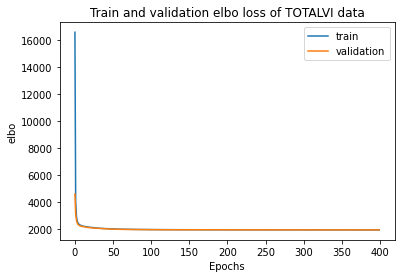

Minimal elbo train value: elbo_train    1920.9021
Name: 399, dtype: object and val value: elbo_validation    1921.606934
Name: 399, dtype: object


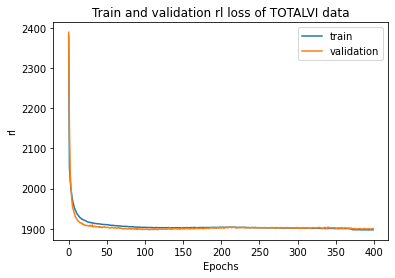

Minimal reconstruction_loss train value: reconstruction_loss_train    1897.249146
Name: 399, dtype: object and val value: reconstruction_loss_validation    1900.662598
Name: 399, dtype: object


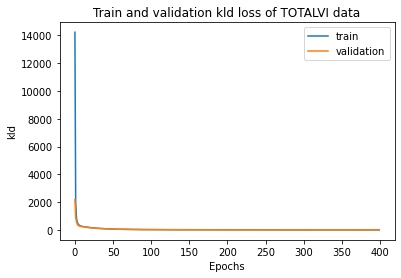

Minimal kl_local train value: kl_local_train    23.653086
Name: 399, dtype: object and val value: kl_local_validation    20.944576
Name: 399, dtype: object


In [4]:
from src_trainer.plotting import plot_single_value, plot_train_val

args_elbo = {'var': "elbo",
             'var_label': "elbo",
             'ylim': None,
             'modality': my_model.args['model_type']
             }
args_rl = {'var': "reconstruction_loss",
           'var_label': "rl",
           'ylim': None,
           'modality': my_model.args['model_type']
           }
args_kld = {'var': "kl_local",
            'var_label': "kld",
            'ylim': None,
            'modality': my_model.args['model_type']
            }

list_args = [args_elbo, args_rl, args_kld]

for plot_args in list_args:
    if my_model.args['check_val_every_n_epoch'] is not None:
        plot_train_val(my_model, plot_args=plot_args, pdf=None)
    else:
        plot_single_value(my_model, plot_args, 'train')
    print("Minimal {} train value: {} and val value: {}".format(
        plot_args['var'], 
        my_model.history['{}_train'.format(plot_args['var'])].iloc[-1],
        my_model.history['{}_validation'.format(plot_args['var'])].iloc[-1],
    ))

# Evaluation reconstructions

In [5]:
from src_trainer.plotting import boxplot_corr, scatterplot_corr
from scipy import sparse, stats
import numpy as np
import pickle

cond_dict = {'group': 'LD',
             'annotation_L1': None,
             'condition': 'PI'}

marker_dict = {'CD4T': [['CD3D', 'CD4'], ['CD3_ADT', 'CD4_ADT']],
                'B': [['MS4A1', 'CD19', 'CD79A'], ['CD19_ADT', 'CD20_ADT']],
                'Monocyte': [['S100A9', 'CD14'], ['CD14_ADT', 'CD16_ADT']]}

col_conds = [{'PG': 'LD', 'ADJ': 'medium'}, 
             {'PG': 'DK', 'ADJ': 'medium'},
             {'PG': 'RT', 'ADJ': 'medium'},
             {'PG': 'LD', 'ADJ': 'PI'},
             {'PG': 'DK', 'ADJ': 'PI'},
             {'PG': 'RT', 'ADJ': 'PI'}]


#all_markers = my_model.adata.var_names
#data = my_model.adata.copy()

## Spearman correlations

### Posterior sampling

In [7]:
filename = '../../results/y_pred_1/{}_{}_{}_{}.pickle'.format(my_model.args['model_type'], my_model.args['model_name'],
                                                     'posterior', 'RNA')
    
with open(filename, 'rb') as handle:
    y_pred_dict = pickle.load(handle) 

FileNotFoundError: [Errno 2] No such file or directory: '../../results/y_pred_1/TOTALVI_20220608-115618_posterior_RNA.pickle'

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    print(key)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m, yt_v, yp_m, yp_v, txt)
    

Plot ranks

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    yt_m_r = stats.rankdata(yt_m)
    yt_v_r = stats.rankdata(yt_v)
    yp_m_r = stats.rankdata(yp_m)
    yp_v_r = stats.rankdata(yp_v)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m_r, yt_v_r, yp_m_r, yp_v_r, txt)
    idx = np.argmax(yt_m)

    #print("The gene with the highest rank is in true is: {} and pred: {}".format(self.all_markers[np.argmax(yt_m)], self.all_markers[np.argmax(yp_m)]))

In [ ]:
boxplot_corr('../../results/csv_1_RNA/{}_{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'posterior', 'RNA'), 
             col_conds, 
             score = "corr_mean")

### Prior sampling

In [ ]:
filename = '../../results/y_pred_1/{}_{}_{}_{}.pickle'.format(my_model.args['model_type'], my_model.args['model_name'],
                                                     'prior', 'RNA')
    
with open(filename, 'rb') as handle:
    y_pred_dict = pickle.load(handle) 

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    print(key)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m, yt_v, yp_m, yp_v, txt)
    

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    yt_m_r = stats.rankdata(yt_m)
    yt_v_r = stats.rankdata(yt_v)
    yp_m_r = stats.rankdata(yp_m)
    yp_v_r = stats.rankdata(yp_v)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m_r, yt_v_r, yp_m_r, yp_v_r, txt)
    idx = np.argmax(yt_m)

    #print("The gene with the highest rank is in true is: {} and pred: {}".format(self.all_markers[np.argmax(yt_m)], self.all_markers[np.argmax(yp_m)]))

In [ ]:
boxplot_corr('../../results/csv_1_RNA/{}_{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'prior', 'RNA'), 
             col_conds, 
             score = "corr_mean")

### Transfer sampling

In [ ]:
filename = '../../results/y_pred_1/{}_{}_{}_{}.pickle'.format(my_model.args['model_type'], my_model.args['model_name'],
                                                     'transfer', 'RNA')
    
with open(filename, 'rb') as handle:
    y_pred_dict = pickle.load(handle) 

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    print(key)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m, yt_v, yp_m, yp_v, txt)

In [ ]:
for key, [yt_m, yt_v, yp_m, yp_v] in y_pred_dict.items():
    yt_m_r = stats.rankdata(yt_m)
    yt_v_r = stats.rankdata(yt_v)
    yp_m_r = stats.rankdata(yp_m)
    yp_v_r = stats.rankdata(yp_v)
    txt = "Correlation for population group, cell type, perturbation: {}".format(key)
    scatterplot_corr(yt_m_r, yt_v_r, yp_m_r, yp_v_r, txt)
    idx = np.argmax(yt_m)

    #print("The gene with the highest rank is in true is: {} and pred: {}".format(self.all_markers[np.argmax(yt_m)], self.all_markers[np.argmax(yp_m)]))

In [ ]:
boxplot_corr('../../results/csv_1_RNA/{}_{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'transfer', 'RNA'), 
             col_conds, 
             score = "corr_mean")